<a href="https://colab.research.google.com/github/BadilloJerahmeel/CCST102-CS3B/blob/main/3B_BADILLO_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data processing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



*   Loading dataset



In [ ]:
data = pd.read_csv('datasets_house_prices.csv')



*   Checking missing values and handling them appropriately



In [ ]:
print(data.isnull().sum())

data.fillna(data.median(), inplace=True)

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


*   Normalize the features to ensure they are on a similar scale

In [ ]:
scaler = MinMaxScaler()
features = data[['Size (sqft)', 'Bedrooms', 'Age']]
normalized_features = scaler.fit_transform(features)

X = pd.DataFrame(normalized_features, columns=['Size (sqft)', 'Bedrooms', 'Age'])
y = data['Price']


# **Model implementation:**

*   Implementing the least squares method to compute model parameters

In [ ]:
def compute_parameters(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

*  Predict functions

In [ ]:
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

# **Model training**

*   Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*  Train your linear regression model on the training set


In [ ]:
theta = compute_parameters(X_train, y_train)

*   Make predictions on the training and test data

In [ ]:
y_train_pred = predict(X_train, theta)
y_test_pred = predict(X_test, theta)


*   Calculate Mean Squared Error

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# **Output**:


In [ ]:
print(f'MSE on training data: {mse_train}')
print(f'MSE on test data: {mse_test}')
print(f'Model parameters (theta): {theta}')

MSE on training data: 170277648.51955354
MSE on test data: 167882080.37329507
Model parameters (theta): [230827.44332799 959039.89092674  18856.32604631 -21009.99159149]


# **Visualization**

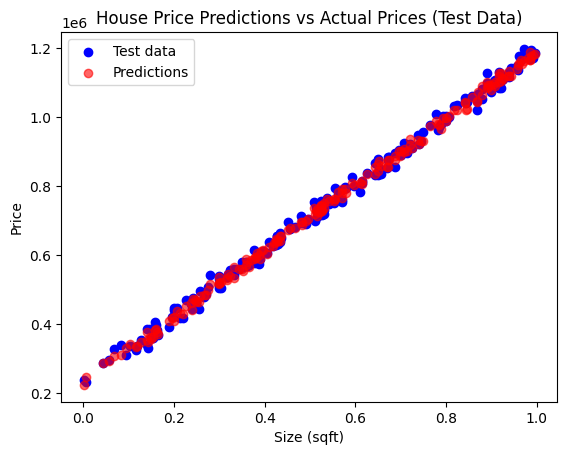

In [ ]:
  plt.scatter(X_test['Size (sqft)'], y_test, color='blue', label='Test data')
  plt.scatter(X_test['Size (sqft)'], y_test_pred, color='red', label='Predictions', alpha=0.6)
  plt.xlabel('Size (sqft)')
  plt.ylabel('Price')
  plt.title('House Price Predictions vs Actual Prices (Test Data)')
  plt.legend()
  plt.show()